# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2020/2021
## Assignment #6 - Bayesian Inference & Hypothesis Testing

***
### Group: C
### Names of members: 
1. Aida Usmanova
1. Emilio Brambilla
1. Navneet Singh Arora
***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://python3.guide/), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=582), especially L10 & L11. **Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, 2 February 2021, 19:59 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, 10 February 2021, 12:00 - 13:30 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A06_Group_A.ipynb 
2. RM_A06_Group_A.pdf

***
***

# Task 1 **[40 points] Bayes Parameter Estimation** 

Please answer each of the following three questions with step-by-step calculations and explanations, using python code and suitable plots.  
  
  
1. Suppose you are a biologist studying a pair of recently discovered species. In your area, 4% of individuals belong to species A and 96% of individuals belong to species B. There is currently no genetic test that is able to distinguish between them. However, they differ in frequency of a rare color pattern. In fact, species A exhibits the rare color pattern in 40% of the cases, while for species B this pattern is found in only 2% of the cases. Assume that these percentages are known with certainty from many years of field research. Now, suppose you find an individual with the rare color pattern. Use Bayes Theorem to calculate the probability that this individual belongs to species A.  

2. Let's assume that after graduating from (high) school, 3% of the graduates will study computer science. From numerous surveys, it is commonly known that among all computer science students, 30% play video and computer games for more than three hours per day on average. In contrast, only 6% of students from other disciplines do just that. You are walking across the campus of the University of Hamburg and ask the first student you encounter about the average amount of hours this student spends gaming every day and you receive "four" as an answer. What is the probability that this student is studying computer science? What is the probability that he/she is taking a different course of study?  

3. You are playing a heated game of Dungeons & Dragons, and the Dungeon Master's (DM) main character always attacks you with two weapons (one dice for each).You would like to know what kind of weapons these are, and you could easily find out if you knew the individual damage rolls, but the DM will only tell you the total sum of both dices. You know that each weapon must be either a d6, d8, d10 or d12 (dX = X-sided dice) and there is no duplicate weapon. You make the hypothesis that the DM is in possession of d6 and d10. What is the probability for this hypothesis, considering that the DM's last five attacks had a total damage of [11, 8, 5, 14, 5]?

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import requests
import io
import datetime
from plotly import tools, subplots
import seaborn as sns
import plotly.graph_objects as go
import decorate

***

## Question 1.1

Suppose you are a biologist studying a pair of recently discovered species. In your area, 4% of individuals belong to species A and 96% of individuals belong to species B. There is currently no genetic test that is able to distinguish between them. However, they differ in frequency of a rare color pattern. In fact, species A exhibits the rare color pattern in 40% of the cases, while for species B this pattern is found in only 2% of the cases. Assume that these percentages are known with certainty from many years of field research. Now, suppose you find an individual with the rare color pattern. Use Bayes Theorem to calculate the probability that this individual belongs to species A.

### Answer 1.1

Before calculations, we summarize the data as below: 

| Species      | Value | Description     |
| :---        |    :----:   |          :--- |
| Species A      | 04%       | Probability of an individual belonging to species A   |
| Species B   | 96%        | Probability of an individual belonging to species B      |
| Total Species   | 100%        | -      |
| Species A's Rare Pattern   | 40%        | Probablity of an individual having rare color patter given that individual belongs to species A      |
| Species B's Rare Pattern   | 02%        | Probablity of an individual having rare color patter given that individual belongs to species B      |
| Total Rare Pattern Species   | 42%        | -      |

A = {Species A}  
B = {Species B}  
H = {Having rare color pattern}  

> $\rightarrow$ p(A) = 0.04  
> $\rightarrow$ p(B) = 0.96  
> $\rightarrow$ p(H|A) = 0.4  
> $\rightarrow$ p(H|B) = 0.02  

We have to find p(A|H) : Probability of creature belonging to species A given that individual has rare color pattern. We will calculate using following formula:  

> $\rightarrow$ p(A|H) = (p(A) * p(H|A))/p(H)

In order to do that, firstly we have to calculate p(H) : Probability of having rare color pattern.   

> $\rightarrow$ p(H) = p(A) * p(H|A) + p(B) * p(H|B)

In [2]:
p_A = 0.04
p_B = 0.96
p_H_A = 0.4
p_H_B = 0.02

p_H = p_A*p_H_A + p_B*p_H_B
p_A_H = (p_A*p_H_A)/p_H

In [3]:
print("Probability of having rare color pattern: ", p_H)
print("Probability of creature belonging to species A given that individual has rare color pattern: ", p_A_H)

Probability of having rare color pattern:  0.035199999999999995
Probability of creature belonging to species A given that individual has rare color pattern:  0.45454545454545464


**RESULT**  

So as per our calculations, 
- There is 45% probablility that the individual found with a rare color pattern belongs to Species A.

***
***

## Question 1.2
Let's assume that after graduating from (high) school, 3% of the graduates will study computer science. From numerous surveys, it is commonly known that among all computer science students, 30% play video and computer games for more than three hours per day on average. In contrast, only 6% of students from other disciplines do just that. You are walking across the campus of the University of Hamburg and ask the first student you encounter about the average amount of hours this student spends gaming every day and you receive "four" as an answer. What is the probability that this student is studying computer science? What is the probability that he/she is taking a different course of study?

### Answer 1.2
Before calculations, we summarize the data as below: 

| Data      | Student's Ratio | Description     |
| :---        |    :----:   |          :--- |
| Computer Science Student     | 03%       | Probability of meeting Computer Science student   |
| Other Students   | 97%        | Probability omeeting non Computer Science student      |
| Total Students   | 100%        | -      |
| Computer Science Student playing Video Games (> 3 hours)   | 30%        | Probablity of a student playing games given that he is Computer Science student      |
| Other Students playing Video Games (> 3 hours)   | 06%        | Probablity of a student playing games given that he is not Computer Science student      |
| Total Students playing Video Games (> 3 hours)   | 36%        | -      |



A = {Computer Science student}  
B = {Non Computer Science student}  
H = {Playing video and computer games}  

> $\rightarrow$ p(A) = 0.03  
> $\rightarrow$ p(B) = 0.97  
> $\rightarrow$ p(H|A) = 0.3  
> $\rightarrow$ p(H|A) = 0.06  

We have to find p(A|H) : Probability of meeting Computer Science student given that met person plays games. We will calculate using following formula:

> $\rightarrow$ p(A|H) = (p(A) * p(H|A))/p(H)

But, firstly we have to calculate p(H) : Probability of playing games. 

> $\rightarrow$ p(H) = p(A) * p(H|A) + p(B) * p(H|B)

In [4]:
p_A = 0.03
p_B = 0.97
p_H_A = 0.3
p_H_B = 0.06

p_H = p_A*p_H_A + p_B*p_H_B
p_A_H = (p_A*p_H_A)/p_H
p_B_H = (p_A*p_H_B)/p_H

In [5]:
print("Probability of playing video and computer games: ", p_H)
print("Probability of meeting Computer Science student playing video and computer games: ", p_A_H)
print("Probability of meeting student from Other subject playing video and computer games: ", p_B_H)

Probability of playing video and computer games:  0.0672
Probability of meeting Computer Science student playing video and computer games:  0.13392857142857142
Probability of meeting student from Other subject playing video and computer games:  0.026785714285714288


**RESULT**  

So as per our calculations, given that the student plays video and computer games:  
  
  
- There is 13.39% probablility that the student met studies Computer Science
- There is 2.67% probablility that the student met studies subject other than Computer Science

***
***

## Question 1.3
You are playing a heated game of Dungeons & Dragons, and the Dungeon Master's (DM) main character always attacks you with two weapons (one dice for each).You would like to know what kind of weapons these are, and you could easily find out if you knew the individual damage rolls, but the DM will only tell you the total sum of both dices. You know that each weapon must be either a d6, d8, d10 or d12 (dX = X-sided dice) and there is no duplicate weapon. You make the hypothesis that the DM is in possession of d6 and d10. What is the probability for this hypothesis, considering that the DM's last five attacks had a total damage of [11, 8, 5, 14, 5]?

### Answer 1.3
We have 4 dices, therefore there exist 6 variants of dice combinations.

(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)

Which means we have 6 hypotheses and in the beginning each combination has equal chance, hence all priors are equal to 1/6.

**Process**
- We start with an uniform prior for all the dice combinations
- We see an attack happening and we update the posterior probabilities of every dices
- We use the previously-calculated posterior-probabilities as the new prior when a new attack shows up
- In the end we get the updated probabilities for each combinations of dices

We create 3 functions:
- calculate_likelihood: function calculates the probability of a specific attack damage to appear using a specific dice combination
- calculate_calculate_normalized_constnat: this function is needed to prevent probabilities going over 1
- calculate_posterior: function calculates posterior based on prior and likelihood

In [6]:
def calculate_likelihood(attack_damage, combination):
    success_num = 0
    die_1 = combination[0]
    die_2 = combination[1]
    for i in range(1, die_1 + 1):
        for j in range(1, die_2 + 1):
            if i + j == attack_damage:
                success_num += 1 
    return success_num/(die_1*die_2)

In [7]:
def calculate_normalized_constnat(attack_damage, combinations, priors):
    norm = 0
    for combination, prior in zip(combinations, priors):
        norm += calculate_likelihood(attack_damage, combination)*prior
    return norm

In [8]:
def calculate_posterior(prior, likelihood, normalized_constant):
    return (prior*likelihood)/normalized_constant

In [9]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors

In [10]:
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])

In [11]:
data['probability'] = data['probability'].map('{:,.3f}'.format)

In [12]:
def plot_posteriors(number, data, step, num, attack):
    plot = go.Figure()
    plot = px.bar(data,
              x="combination",
              y="probability",
              barmode='group',
              text="probability",
              range_y=[0,1],
              color='type',
              labels=dict(type="Prior and Posterior",
                          combination="Dice Combinations",
                          probability="Probability"))

    plot.data[0].name = "Prior Values"
    plot.data[1].name = "Posterior Values"
    plot.update_layout(width=900,
                   title_text="Figure-" + str(number) + ": -- " + step + num + "Initial Prior v/s Final Posteriors " + attack,
                   title_x=0.5, 
                   bargroupgap=0.1, 
                   bargap=0.3)

    plot.update_traces(texttemplate='%{text}',
                   textposition='outside')

    plot.show(renderer='svg', width=900, height=500)

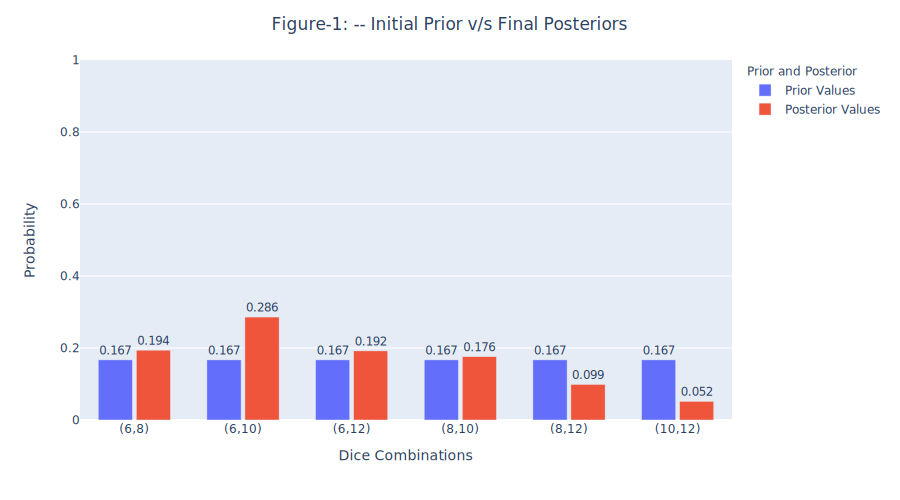

In [13]:
plot_posteriors(1, data, '', '', '')

**RESULT**  

Lookin at the plot above **(Figure-1)** we clearly see that: 

Starting from a uniform prior's baseline (i.e. no particular assumption has been made) -> Blue bars
- The combination of dices (d6,d10) has the higher probability of being the originator of the given attacks [11, 8, 5, 14, 5]
- The combination of "big" dices are capable to generate bigger results e.g max(d10,d12)= 22, but the seen attacks are all below 14. This cut down the posterior probability (-> red bars) of such combinations of dices 

Therefore, probability for this hypothesis, considering that the DM's last five attacks had a total damage of [11, 8, 5, 14, 5] is 0.286 or 28.6%

***
***

# Task 2 **[60 points] Savage-Dickey Method**

Returning to the Dungeons & Dragons scenario from task 1.3, our goal is now to test and evaluate our hypothesis of the DM using a combination of the two dices d6 and d10.
1. Name one uninformed and one informed prior you would pick for the upcoming hypothesis test and motivate your decision.
2. Perform a test on the given d6/d10 hypothesis following the Savage-Dickey method and using the **uninformed prior** that you previously chose. Show your calculation steps in python as well as the resulting Bayes Factor.
3. Repeat the test, but this time using the **informed prior**. Show again intermediate steps and the resulting Bayes Factor.
4. Analyze both test outcomes from subtasks 2. and 3. and compare them. Explain how to interpret the Bayes Factor and give reasons for potential discrepancies between different kinds of priors.
5. Given your test results, would you assume a different dice combination and why? Support your reasoning with a suitable diagram.

***

## Question 2.1
Name one uninformed and one informed prior you would pick for the upcoming hypothesis test and motivate your decision.

### Answer 2.1
- **Uninformed**: We don't know which dice the DM picks, therefore each dice combination has equal chances.

- **Informed** (Assuming that the dices' options available are [d6, d8, d10, d12]): 
  - the DM  would tend to pick certain dice combinations (d8, d10) 
  (however in original game there are 6 type of dices available)  
    
  - **Motivation**: The task of a DM is to create a fun and interesting game by setting up the target numbers and providing good stories. If the player's attack is equal or exceeds the target number then the player will easyly slay the monster, otherwaise he'll fail the mission. So if DM sets a very high target number then the game will end very quickly and nobody will have fun, same works vice versa: if the target number is low, in that case all the players can easily overcome the monster. 

  - I.e. by picking d12 there is a high risk to set very high target number and with d6 the target number could be low. That is why we assume that the DM would prefer d8 and d10 dice combination which are the two dices exactly in the middle.

***
***

## Question 2.2
Perform a test on the given d6/d10 hypothesis following the Savage-Dickey method and using the uninformed prior that you previously chose. Show your calculation steps in python as well as the resulting Bayes Factor.

### Answer 2.2
An uniformed prior means that all priors are uniformly dirstibuted. In answer 1.3 we had the same case, where all priors where equal.

According to Savage-Dickey method we can calculate the Bayes factor by dividing the height of the posterior by the height of the prior (if we are dealing with nested hypotheses).

We assume that our theta is the (d6,d10) dice combination. For this combination we know prior and posteriors, 0.167 and 0.286 respectively.

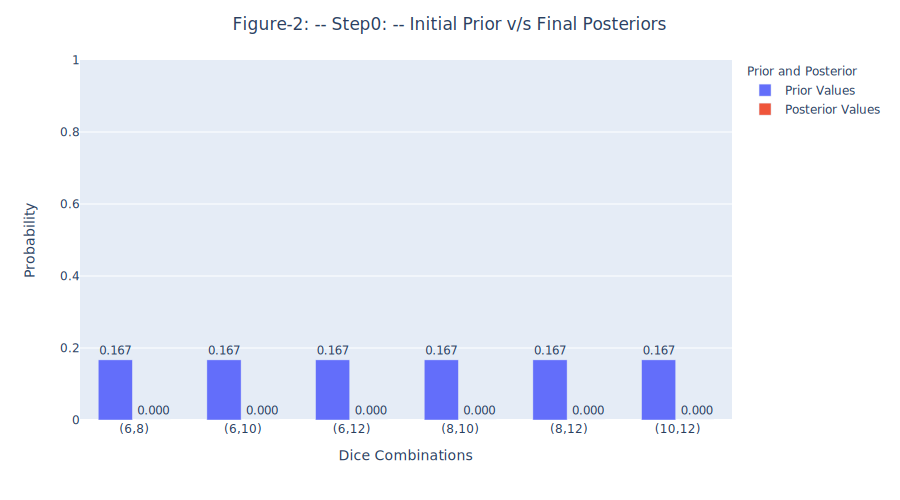

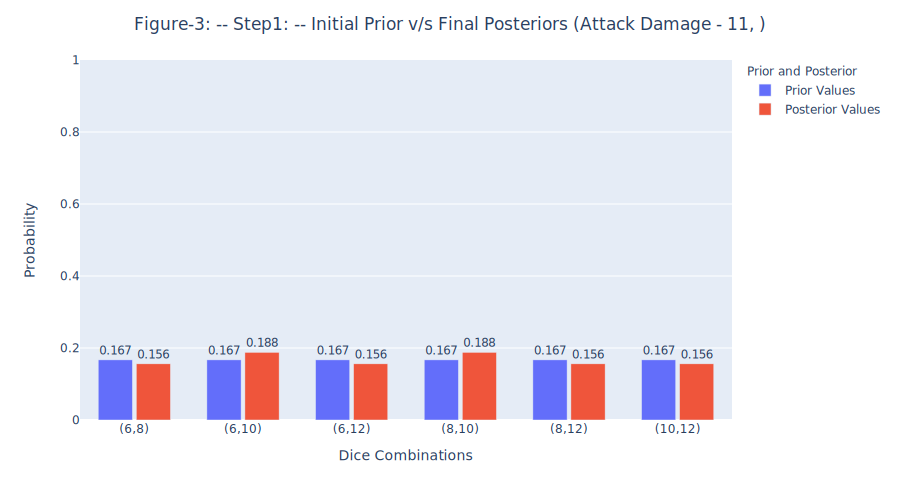

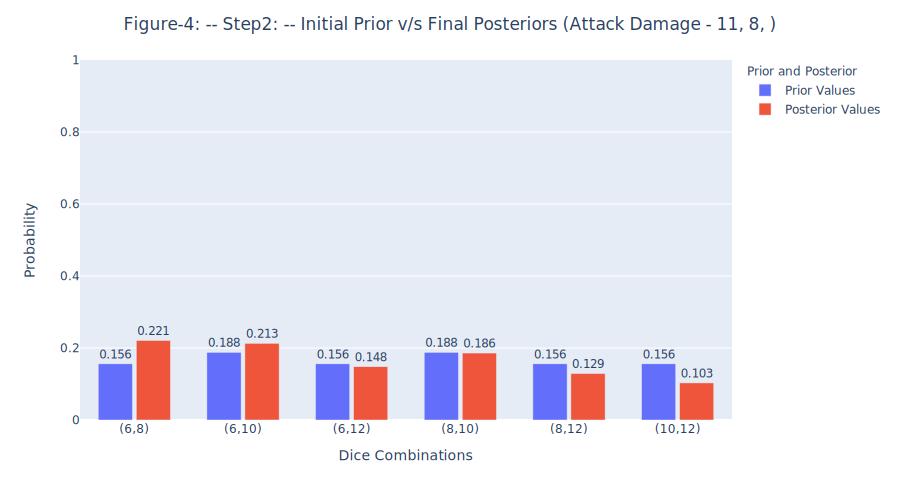

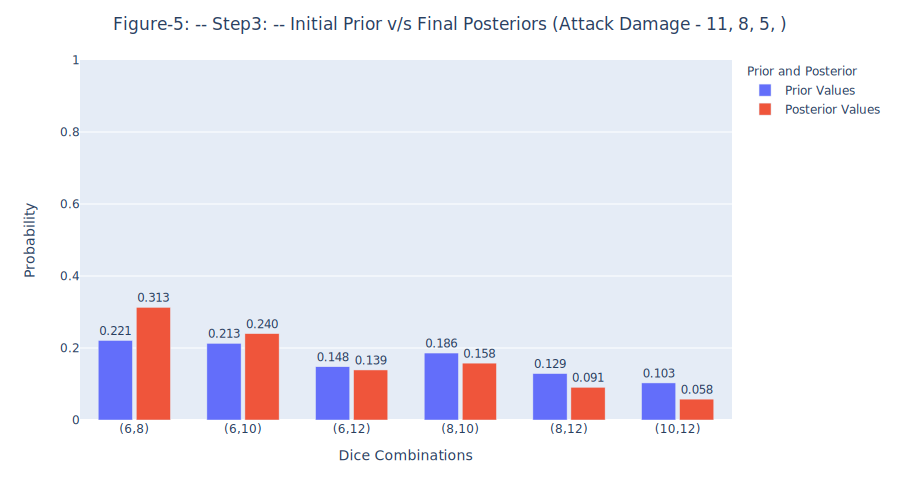

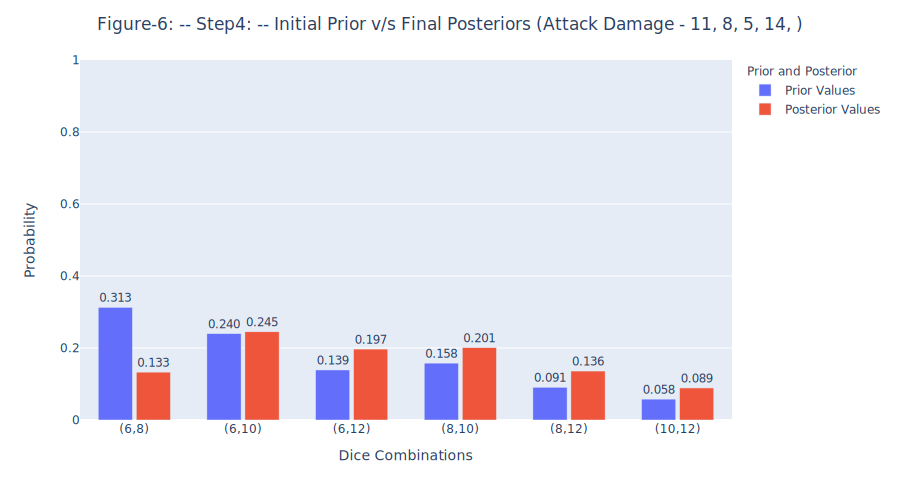

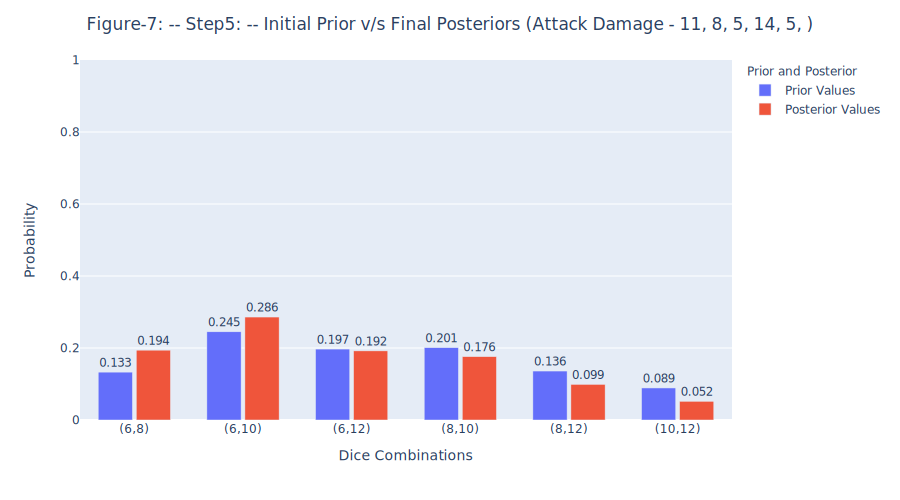

In [14]:
posteriors = [0, 0, 0, 0, 0, 0]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(2, data, 'Step', str(0)+': -- ', '')

combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]
attack_damages = [11, 8, 5, 14, 5]
j = 1
damage = ''
for attack_damage in attack_damages:
    damage = damage + str(attack_damage) + ', '
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
    data['probability'] = data['probability'].map('{:,.3f}'.format)
    plot_posteriors(2 + j, data, 'Step', str(j)+': -- ', '(Attack Damage - ' + str(damage) + ')')    
    combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
    j = j+1
    priors = posteriors

posteriors = priors
priors = [1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6, 1.0/6]

From **Figure-2 to Figure-7**, we show the step by step change based on every attack damage. We can see from **Figure-7** that the posterior for dice combination of **(6,10)** is the maximum, leading us to the evidence in favor of the Null Hypothesis $H_0$.  

We will try to verify this using the Bayes Factor through Savage-Dickey Method.

In [15]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.7183907763470916


In [16]:
#saving bf values for later comparison
comparison_df = pd.DataFrame([], columns= ['prior','type','value'])
prior_temp = pd.Series(['un-informed','prior', prior_6_10])
posterior_temp = pd.Series(['un-informed','posterior', posterior_6_10])
bf_temp = pd.Series(['un-informed','bf', bf])

comparison_df.loc[1] = prior_temp.to_list()
comparison_df.loc[2] = posterior_temp.to_list()
comparison_df.loc[3] = bf_temp.to_list()
print(comparison_df)

         prior       type     value
1  un-informed      prior  0.166667
2  un-informed  posterior  0.286398
3  un-informed         bf  1.718391


**RESULT**  

The Bayes factor is 1.71, which represents a weak evidance in favor of $H_0$.

***
***

## Question 2.3
Repeat the test, but this time using the informed prior. Show again intermediate steps and the resulting Bayes Factor.

### Answer 2.3
As stated in 2.1, our informed prior is that the Dungeon Master would tand to pick a certain dices, specifically d8, d10.
Hence, our baseline of uniform priorities cannot be applied anymore.

For testing purposes we therefore model our priors following a normal distribution curve (since the two extreme dices are now less probable to be picked).

The following graph shows the propesed probabilities for all the possibile combinations.

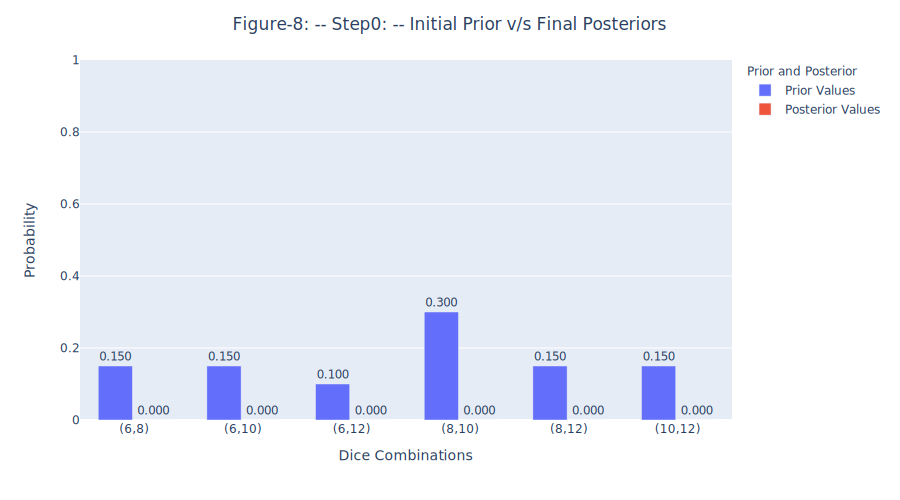

In [17]:
posteriors = [0, 0, 0, 0, 0, 0]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(8, data, 'Step', str(0)+': -- ', '')

We are now ready to update the probabilities with the given set of attacks [11, 8, 5, 14, 5]

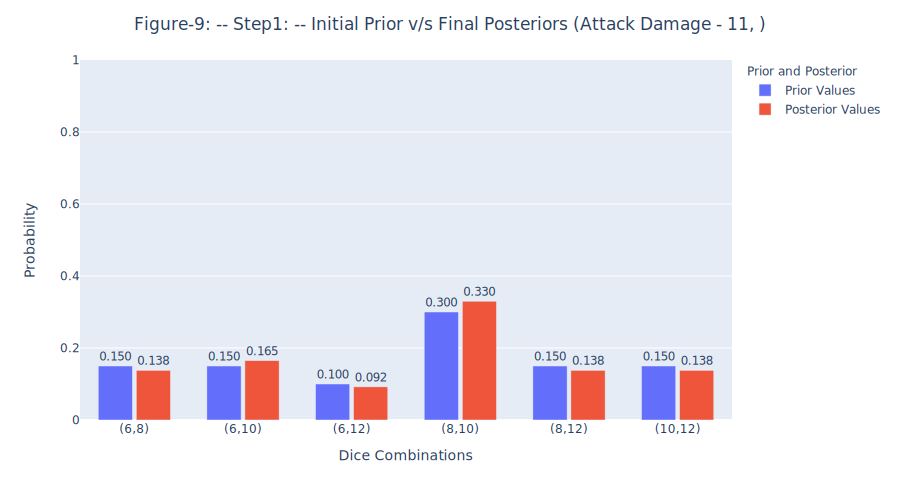

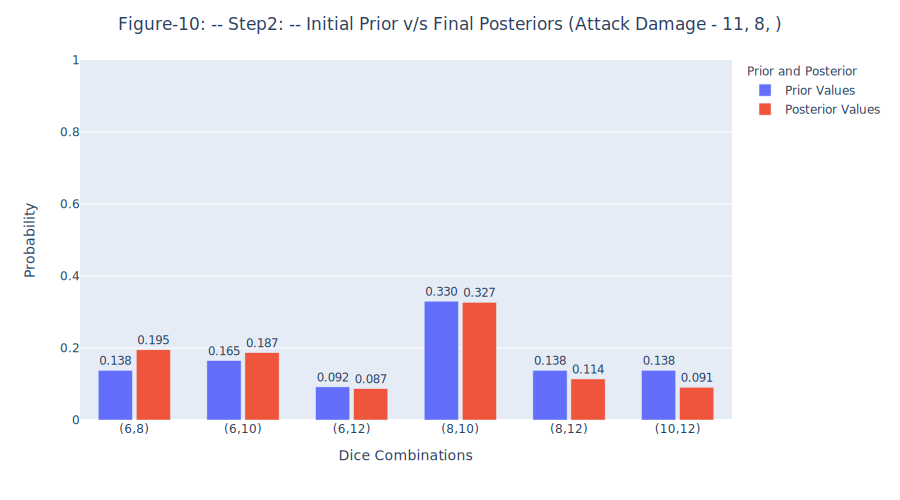

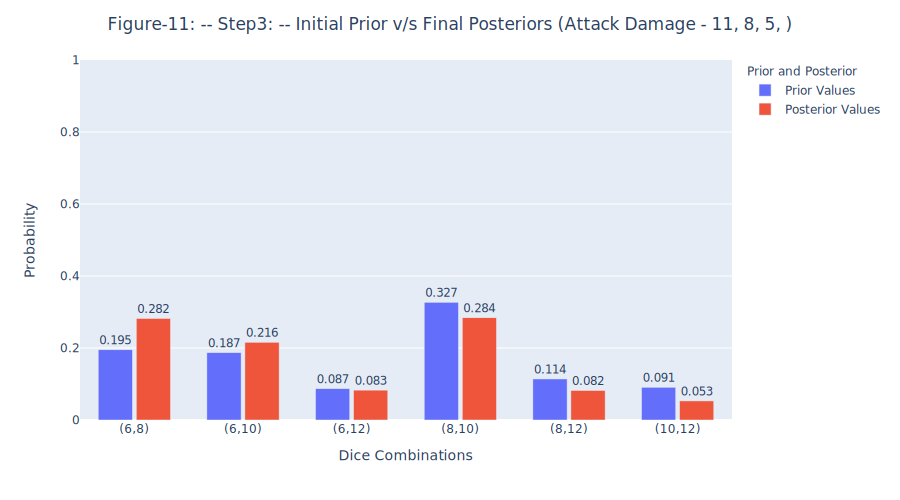

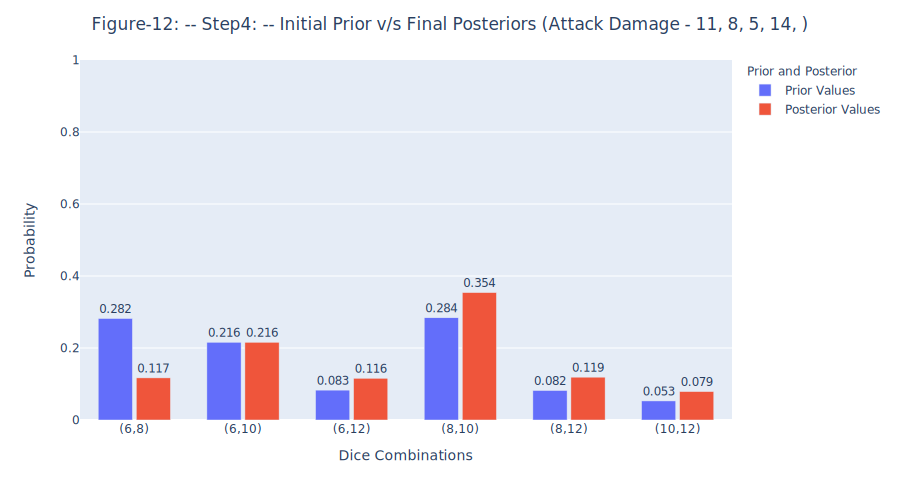

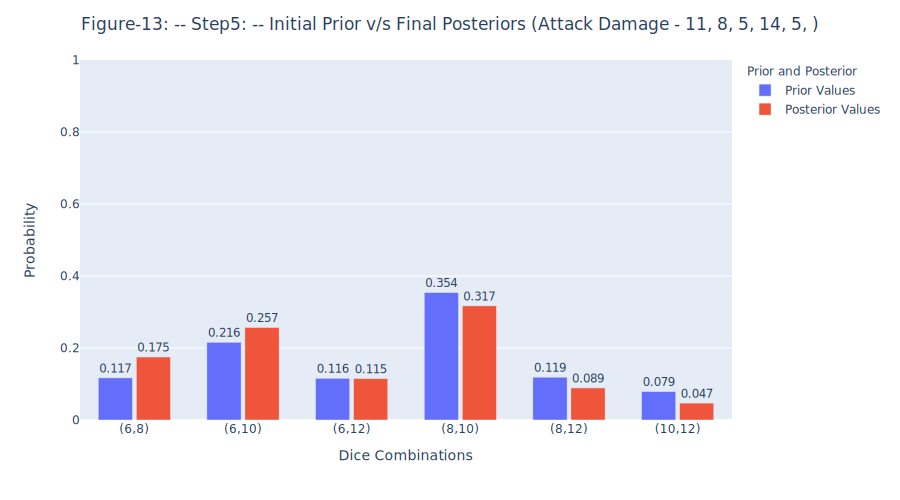

In [18]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
attack_damages = [11, 8, 5, 14, 5]
j = 1
damage = ''
for attack_damage in attack_damages:
    damage = damage + str(attack_damage) + ', '
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
    data['probability'] = data['probability'].map('{:,.3f}'.format)
    plot_posteriors(8 + j, data, 'Step', str(j)+': -- ', '(Attack Damage - ' + str(damage) + ')')    
    combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
    j = j+1
    priors = posteriors

posteriors = priors
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]

In [19]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.7166168212979886


In [20]:
#saving bf values for comparison 
prior_temp = pd.Series(['informed','prior', prior_6_10])
posterior_temp = pd.Series(['informed','posterior', posterior_6_10])
bf_temp = pd.Series(['informed','bf', bf])
comparison_df.loc[4] = prior_temp.to_list()
comparison_df.loc[5] = posterior_temp.to_list()
comparison_df.loc[6] = bf_temp.to_list()

**RESULT**  

- In the prevous graphs it has been made clear how each attack step by step modify our final probability guess

- Even nowing that DM tends to pick ceratain dices(informed-prior); we still got an empirical Bayas Factor of 1.71 (which is very close to the previous one calculated for the un-informed bias). This issue will be discussed in the next point


***
***

## Question 2.4
Analyze both test outcomes from subtasks 2. and 3. and compare them. Explain how to interpret the Bayes Factor and give reasons for potential discrepancies between different kinds of priors.

### Answer 2.4

**Bayes Factor Interpretation**:  
Given one initial hypotesis ($H_0$,$H_1$), the Bayes factor is calculated by dividing the posterior probability by the prior probability. 
- a value of 1 signify that there's no evidence towards the Null Hypopthesis
- a value < 1 testifies in favor the Null hypothesis $H_1$ 
- a value > 1 testifies in favor of $H_0$ 


**Considerations after our analysis**: 

Analyzing both the outcomes from Subtask 2 and 3 , shows us that both with the informative prior and without the informative prior, the Bayes Factor does not change significantly. It provides a very weak evidence towards the null hypothesis $H_0$. 

On the other hand, when we try to increase the number of attacks (more on this in 2.5), the Bayes Factor tends to provide a stronger evidence towards/against the null hypothesis. This suggests that with the provided small number of attacks, any informative prior will have a weak effect on the final outcome of the Bayes Factor and the test has to be continued to get any conclusive evidence with more number of attacks.

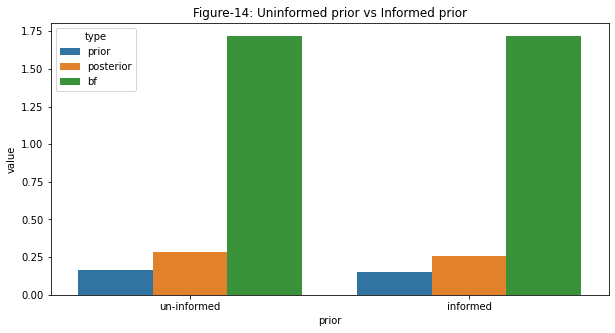

In [21]:
#plot 
plt.figure(figsize=(10,5))
plt.title('Figure-14: Uninformed prior vs Informed prior')
sns.barplot(x='prior', 
            hue='type', 
            y='value', 
            data=comparison_df)
plt.show()

To confirm what is said, we'll run another informed test **with a different attacks-vector**, we'll then compare the new Bayesian Factor with the one originated by the uninformed prior.

the new set of attacks will be the same as before, just tripled:
- first_test attacks = [11, 8, 5, 14, 5]
- new_test attacks = [11, 8, 5, 14, 5, 11, 8, 5, 14, 5, 11, 8, 5, 14, 5]

In [22]:
attack_damages= [11, 8, 5, 14, 5, 11, 8, 5, 14, 5, 11, 8, 5, 14, 5]
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]
posteriors = []
for attack_damage in attack_damages:
    posteriors = []
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
    
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors
    data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
    

posteriors = priors
priors = [0.15, 0.15, 0.1, 0.3, 0.15, 0.15]

#calculatine new bf 
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10
print("Bayes factor: ", bf)

#saving bf values for comparison 
prior_temp = pd.Series(['informed','prior', prior_6_10])
posterior_temp = pd.Series(['informed','posterior', posterior_6_10])
bf_temp = pd.Series(['informed','bf', bf])
comparison_df.loc[4] = prior_temp.to_list()
comparison_df.loc[5] = posterior_temp.to_list()
comparison_df.loc[6] = bf_temp.to_list()

Bayes factor:  3.2913601295479


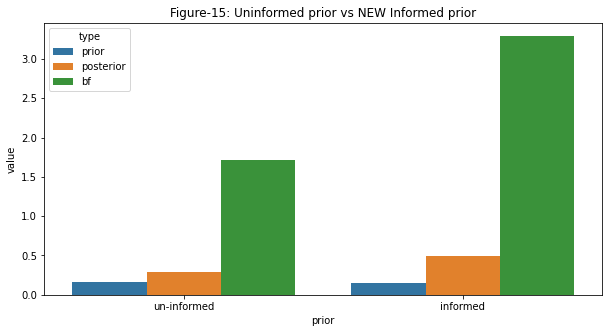

In [23]:
#plot priors
plt.figure(figsize=(10,5))
plt.title('Figure-15: Uninformed prior vs NEW Informed prior')
sns.barplot(x='prior', 
            hue='type', 
            y='value', 
            data=comparison_df)
plt.show()

***
***

## Question 2.5
Given your test results, would you assume a different dice combination and why? Support your reasoning with a suitable diagram.

### Answer 2.5
To answer this question, let's analyze the possibile reasons why we should switch our original combination: 

We'll switch our original combination only if we'll see a **posterior probability** greater than our baseline knowledge (i.e. doesn't matter if uninformed or informed)

The **posterior probability** is heavily impacted by:  

- **Prior probability**: *How confident are we that the Dungeon master will pick a specific combination? (Figure-16 to Figure-20)*  
If this confidence is slightly, than we won't see any particulal update in the final probability. Instead, if we are stongly confident that the DM will choose a specific combination (e.g. we know there's a 90% probability of choosing the combination d10,d12 and 10% spread on the other combinations) than we'll see a strong boost in the posterior probability of d10,d12. Therefore we should switch in favor of it.  
  
  
- **Number of attacks:** *How many attacks are we seeing? (Figure-21 to Figure-23)*  
The posterior probability gets stronger and stronger with the amount of the same data it gets feed: if the same attacks-damages are shown over and over the posterior probability will rise in favor of a certain combination. (Unfortunatley the only few options given [11, 8, 5, 14, 5] don't seem enough alone to create a decent gap between the various combinations to confidently switch combination).  
  
  
- **Variance of the attacks:** *How spread out are the attacks number that we see? (Figure-24 to Figure-25)*  
As said previously, only one big attack (e.g. 22) would eliminate all the combinations other than (d10,d12). This example alone is not enough, but it clearly hints that the attacks/events close to the possible boundries (i.e. 2 and 22) will strongly modify our convinction towards our extreme combinations (i.e. d6,d8 & d10,d12). Finally, the variance of the attacks impact the posterior probability.  
  


#### Analysis Part-1. 

In this we assume that the informed prior for a particular dice combination is very high - 90% or 0.9. We keep the number of attacks same as [11, 8, 5, 14, 5]. We will try to see if the having high informative prior suggests something or not through the following experiment.

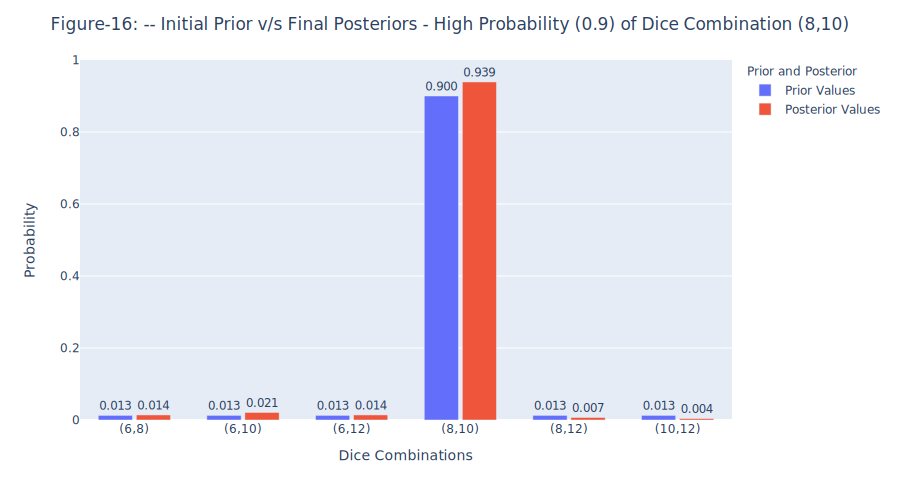

In [24]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.0125, 0.0125, 0.0125, 0.9, 0.0125, 0.0125]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

priors = [0.0125, 0.0125, 0.0125, 0.9, 0.0125, 0.0125]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(16, data, '', '', '- High Probability (0.9) of Dice Combination (8,10)')    

In [25]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.6958753108663638


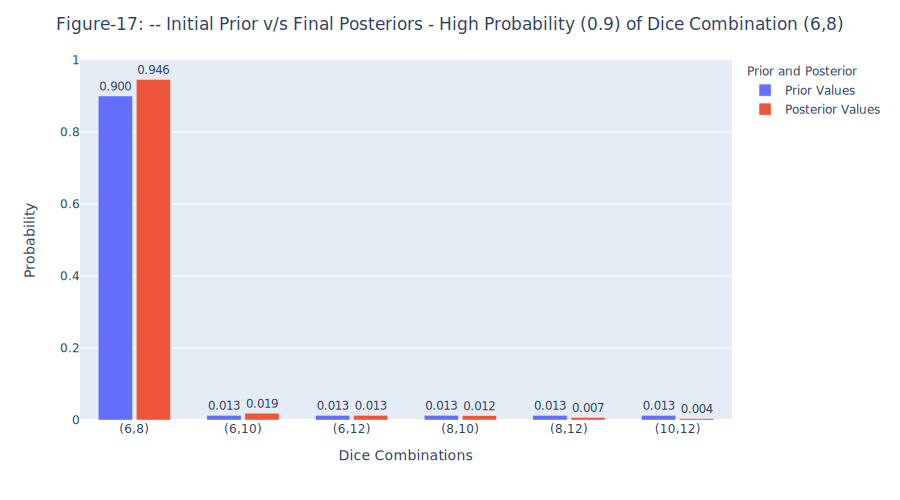

In [26]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.9, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors


priors = [0.9, 0.0125, 0.0125, 0.0125, 0.0125, 0.0125]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(17, data, '', '', '- High Probability (0.9) of Dice Combination (6,8)')    

In [27]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.5491388153665588


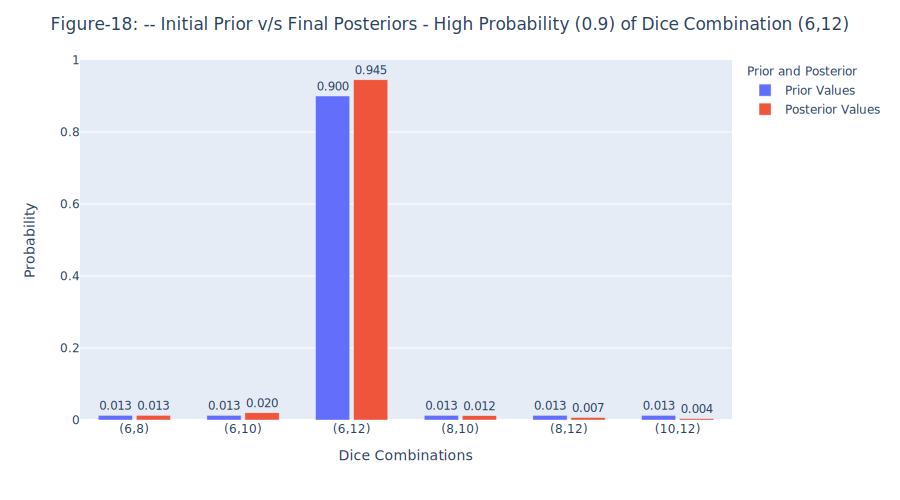

In [28]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.0125, 0.0125, 0.9, 0.0125, 0.0125, 0.0125]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

priors = [0.0125, 0.0125, 0.9, 0.0125, 0.0125, 0.0125]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(18, data, '', '', '- High Probability (0.9) of Dice Combination (6,12)')    

In [29]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.567178531679126


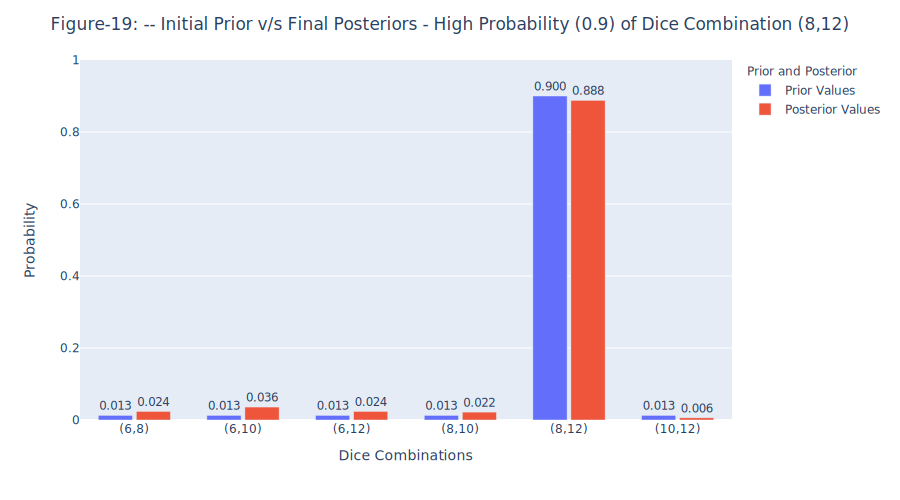

In [30]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.0125, 0.0125, 0.0125, 0.0125, 0.9, 0.0125]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

priors = [0.0125, 0.0125, 0.0125, 0.0125, 0.9, 0.0125]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(19, data, '', '', '- High Probability (0.9) of Dice Combination (8,12)')    

In [31]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  2.8502026950261774


In [32]:
high_probability_factor = {}
high_probability_factor['Dice Combination'] = ['(6,8)', '(6,12)', '(8,10)', '(8,12)']
high_probability_factor['Bayes Factor'] = ['1.549', '1.567', '1.695', '2.850']

In [33]:
high_probability_factor = pd.DataFrame(high_probability_factor).reset_index()

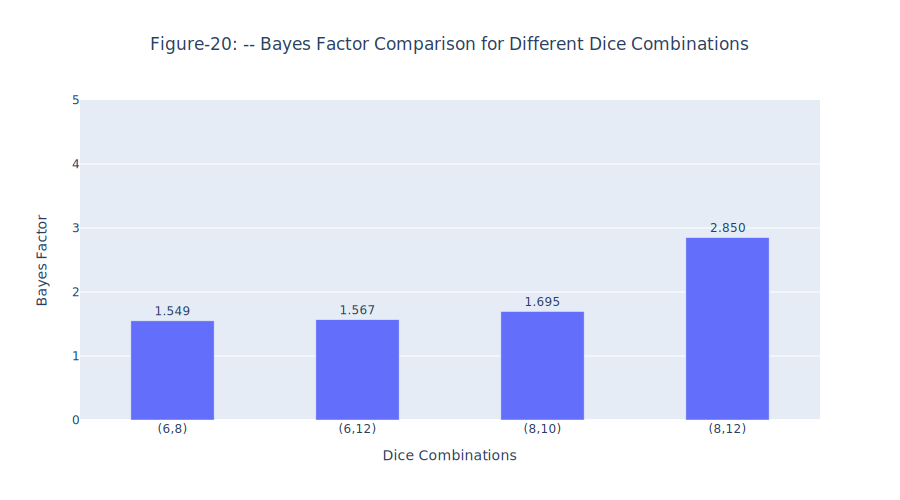

In [34]:
fig = go.Figure(data=[go.Bar(
            x=high_probability_factor['Dice Combination'], y=high_probability_factor['Bayes Factor'],
            text=high_probability_factor['Bayes Factor'],
            textposition='outside'
        )])

fig.update_layout(width=900,
                   title_text="Figure-20: -- Bayes Factor Comparison for Different Dice Combinations ",
                   title_x=0.5, 
                   bargroupgap=0.1, 
                   bargap=0.5)

fig.update_traces(texttemplate='%{text}',
                   textposition='outside')
fig.update_yaxes(
        title_text = "Bayes Factor",
        range = [0,5])
fig.update_xaxes(
        title_text = "Dice Combinations")

fig.show(renderer='svg', width=900, height=500)

Through **Figure-16 to Figure 20**, we can see that with same informed prior using different dice combinations, there is no significant difference between Bayes Factor for all these combinations. Only in case of dice combination of (8,12), we have a higher value for Bayes Factor as the posterior value decreases below the prior suggesting that the attack damages are not for the specific dice combination and leads more towards the null hypothesis.

Now, we further try to valuate by comparing the effect of the total number of attacks, keep them as 5 for the first scenario and for the second scenario, increasing the number of attacks from 5 currently to 20 and keeping the priors same for different dice combinations.

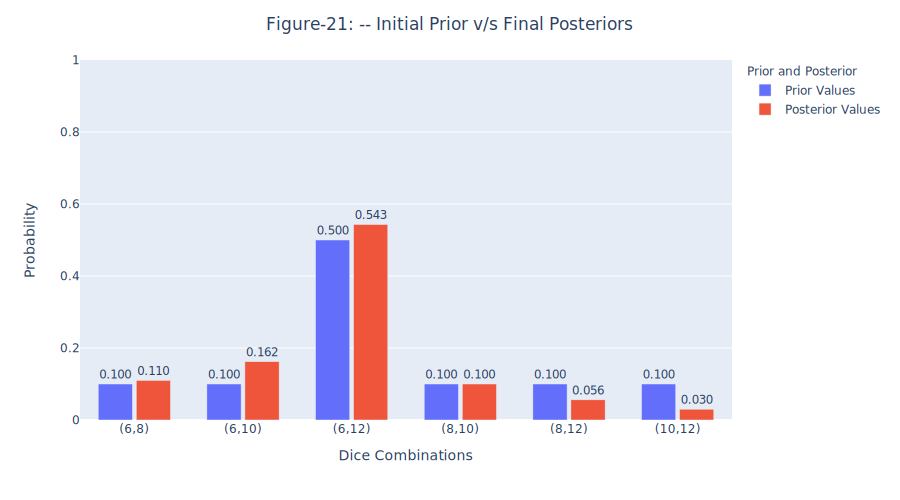

In [35]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(21, data, '', '', '')    

In [36]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  1.6205294723098214


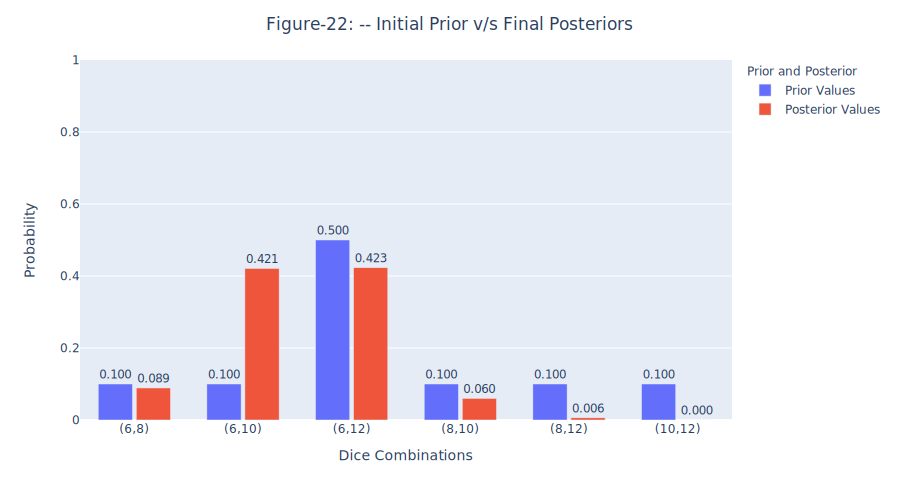

In [37]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
attack_damages = [11, 8, 5, 14, 5, 11, 8, 5, 14, 5, 11, 8, 5, 14, 5, 11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(22, data, '', '', '')    

In [38]:
prior_6_10 = priors[1]
posterior_6_10 = posteriors[1]
bf = posterior_6_10/prior_6_10

print("Bayes factor: ", bf)

Bayes factor:  4.207723979520904


In [39]:
high_probability_factor = {}
high_probability_factor['Dice Combination'] = ['5 Attacks', '20 Attacks']
high_probability_factor['Bayes Factor'] = ['1.620', '4.207']

In [40]:
high_probability_factor = pd.DataFrame(high_probability_factor).reset_index()

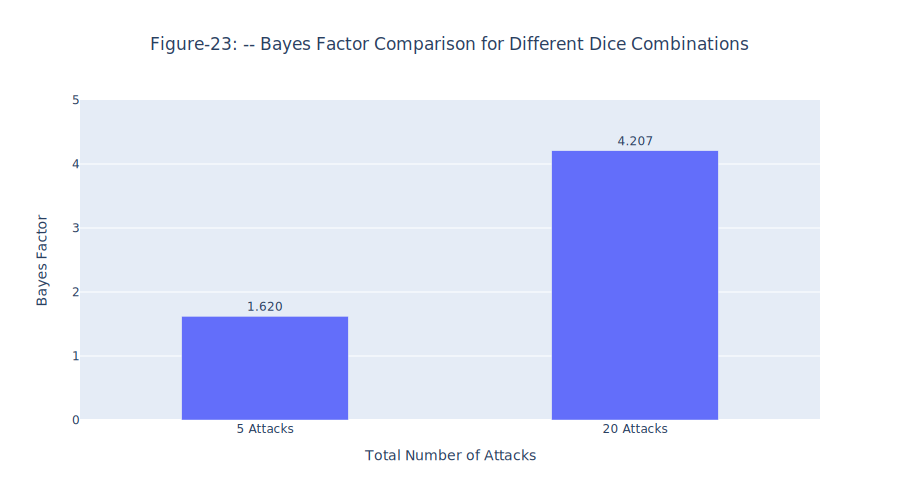

In [41]:
fig = go.Figure(data=[go.Bar(
            x=high_probability_factor['Dice Combination'], y=high_probability_factor['Bayes Factor'],
            text=high_probability_factor['Bayes Factor'],
            textposition='outside'
        )])

fig.update_layout(width=900,
                   title_text="Figure-23: -- Bayes Factor Comparison for Different Dice Combinations ",
                   title_x=0.5, 
                   bargroupgap=0.1, 
                   bargap=0.5)

fig.update_traces(texttemplate='%{text}',
                   textposition='outside')
fig.update_yaxes(
        title_text = "Bayes Factor",
        range = [0,5])
fig.update_xaxes(
        title_text = "Total Number of Attacks")


fig.show(renderer='svg', width=900, height=500)

Here **Figure-21 to Figure-23**, we see that with more information of the attack damage or number of attacks, the evidence becomes much more conclusive as compared to informed prior. Therefore, we consider amount of attacks much more useful and would suggest to keep on gathering the data to come to the conclusive evidence.

Before concluding and coming on a decison, we would like explore one more aspect where we try to assume the varying amount of damage attacks and see how this affects the overall Bayes Factor.

In [42]:
#variance plot
import statistics
attacks = [11, 8, 5, 14, 5]

m = statistics.mean(attacks)
std= statistics.stdev(attacks)
print('mean :', m, '\nStd :', std)

mean : 8.6 
Std : 3.9115214431215892


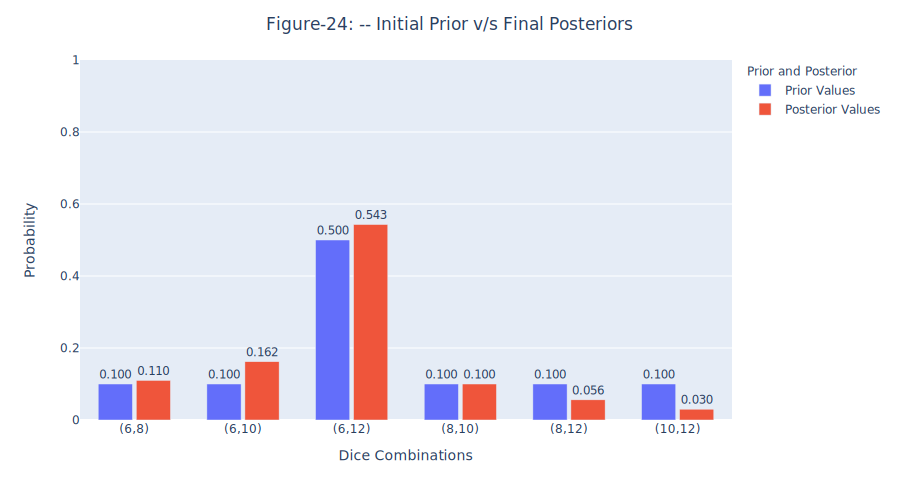

In [43]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
attack_damages = [11, 8, 5, 14, 5]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(24, data, '', '', '')    

In [44]:
#variance plot
import statistics
attacks = [11, 8, 5, 14, 5, 2, 16, 13, 9, 17, 3, 7, 16, 10, 7, 18, 16, 12, 4, 8]

m = statistics.mean(attacks)
std= statistics.stdev(attacks)
print('mean :', m, '\nStd :', std)

mean : 10.05 
Std : 5.010252646219287


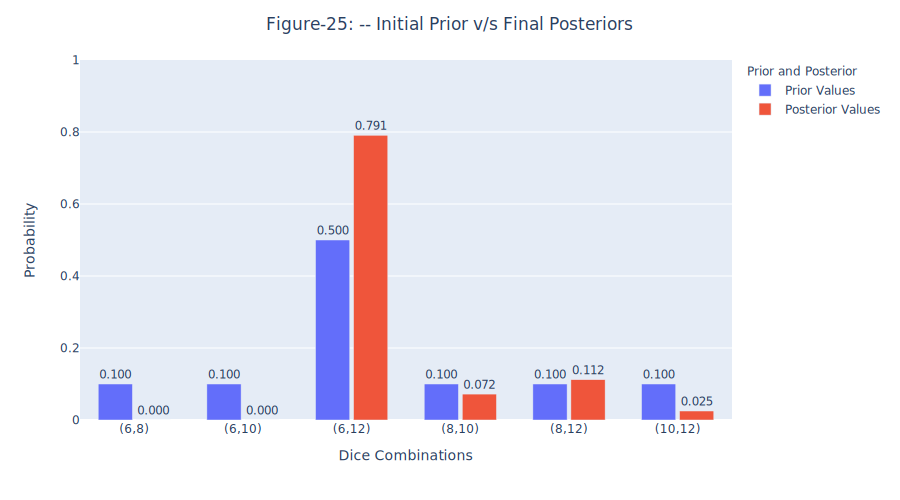

In [45]:
combinations = [(6,8), (6,10), (6,12), (8,10), (8,12), (10,12)]
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
attack_damages = [11, 8, 5, 14, 5, 2, 16, 13, 9, 17, 3, 7, 16, 10, 7, 18, 16, 12, 4, 8]

for attack_damage in attack_damages:
    posteriors = []
    for i, combination in enumerate(combinations):
        posteriors += [calculate_posterior(priors[i], calculate_likelihood(attack_damage, combination), calculate_normalized_constnat(attack_damage, combinations, priors))]
    priors = posteriors

posteriors = priors
priors = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1]
combinations = ['(6,8)', '(6,10)', '(6,12)', '(8,10)', '(8,12)', '(10,12)']
data = pd.DataFrame(zip(combinations*6, ['prior']*6+['posterior']*6, priors+posteriors), columns=['combination', 'type', 'probability'])
data['probability'] = data['probability'].map('{:,.3f}'.format)
plot_posteriors(25, data, '', '', '')    

Through this analysis **Figure24 to Figure-25**, we could see that the informed prior has no effect if we have enough data available that could suppress the effect of the informed prior. Also with increase in variance, the effect of the informed prior nullifies further as the old posterior becomes the new prior.

**RESULT**  

Our best guess comes from a mixture of Prior knowledge and Events we have seen so far. In the end of every experiment it's better to choose whichever posterior probability is the highest since it's the most probable.

Therefore:  

- if we don't have any prior knowledge available 
we would not change our hypothesis (d6,d10) for any other one.

- if we are given a prior such as the one we made up for 2.4:
We now choose to change our initial hypothesis (d6,d10) to (d8,d10) which despite the decreasing posterior probability remain our best guess.